<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml08_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Stochastic Gradient Descent(SGD, 확률적 경사 하강법)

In [2]:
w = np.arange(-5, 5, 0.001)
cost = w**2  # 비용 함수

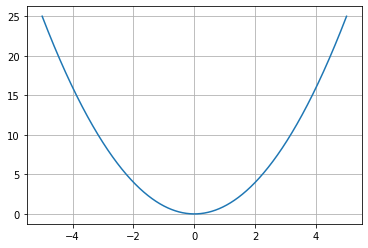

In [3]:
plt.plot(w, cost)

plt.grid()
plt.show()

In [4]:
w_init = -4

In [5]:
w_grad = 2 * w_init

In [6]:
learning_rate = 0.1

In [7]:
w_new = w_init - learning_rate * w_grad

In [8]:
w_new

-3.2

In [9]:
w_init = w_new
w_grad = 2 * w_init
w_new = w_init - learning_rate * w_grad
w_new

-2.56

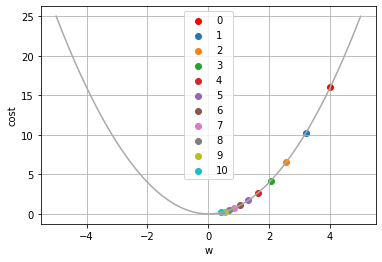

In [19]:
plt.plot(w, cost, color='darkgray')

w_init = 4
cost_init = w_init ** 2
plt.scatter(w_init, cost_init, color='red', label='0')

learning_rate = 0.1
for epoch in range(10):
    w_grad = 2 * w_init
    w_new = w_init - learning_rate * w_grad
    cost_new = w_new ** 2
    plt.scatter(w_new, cost_new, label=f'{epoch+1}')
    w_init = w_new

plt.legend()
plt.grid()
plt.xlabel('w')
plt.ylabel('cost')
plt.show()